In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [120]:
data = pd.read_csv('./datapenumpang.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,NaN,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26,NaN,S


In [121]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


In [122]:
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [123]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,707.000000,707.000000,707.000000,707,707,562.000000,707.000000,707.000000,707,688.000000,159,706
unique,NaN,NaN,NaN,707,2,NaN,NaN,NaN,563,NaN,121,3
top,NaN,NaN,NaN,"Kelly, Mrs. Florence ""Fannie""",male,NaN,NaN,NaN,CA 2144,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,6,NaN,4,506
mean,354.000000,0.387553,2.308345,NaN,NaN,30.034253,0.530410,0.383310,NaN,92.505605,NaN,NaN
std,204.237607,0.487537,0.835458,NaN,NaN,14.626759,1.067214,0.815157,NaN,161.526268,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,177.500000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN
50%,354.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,27.750000,NaN,NaN
75%,530.500000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,78.958000,NaN,NaN


In [124]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare            19
Cabin          548
Embarked         1
dtype: int64

<Axes: >

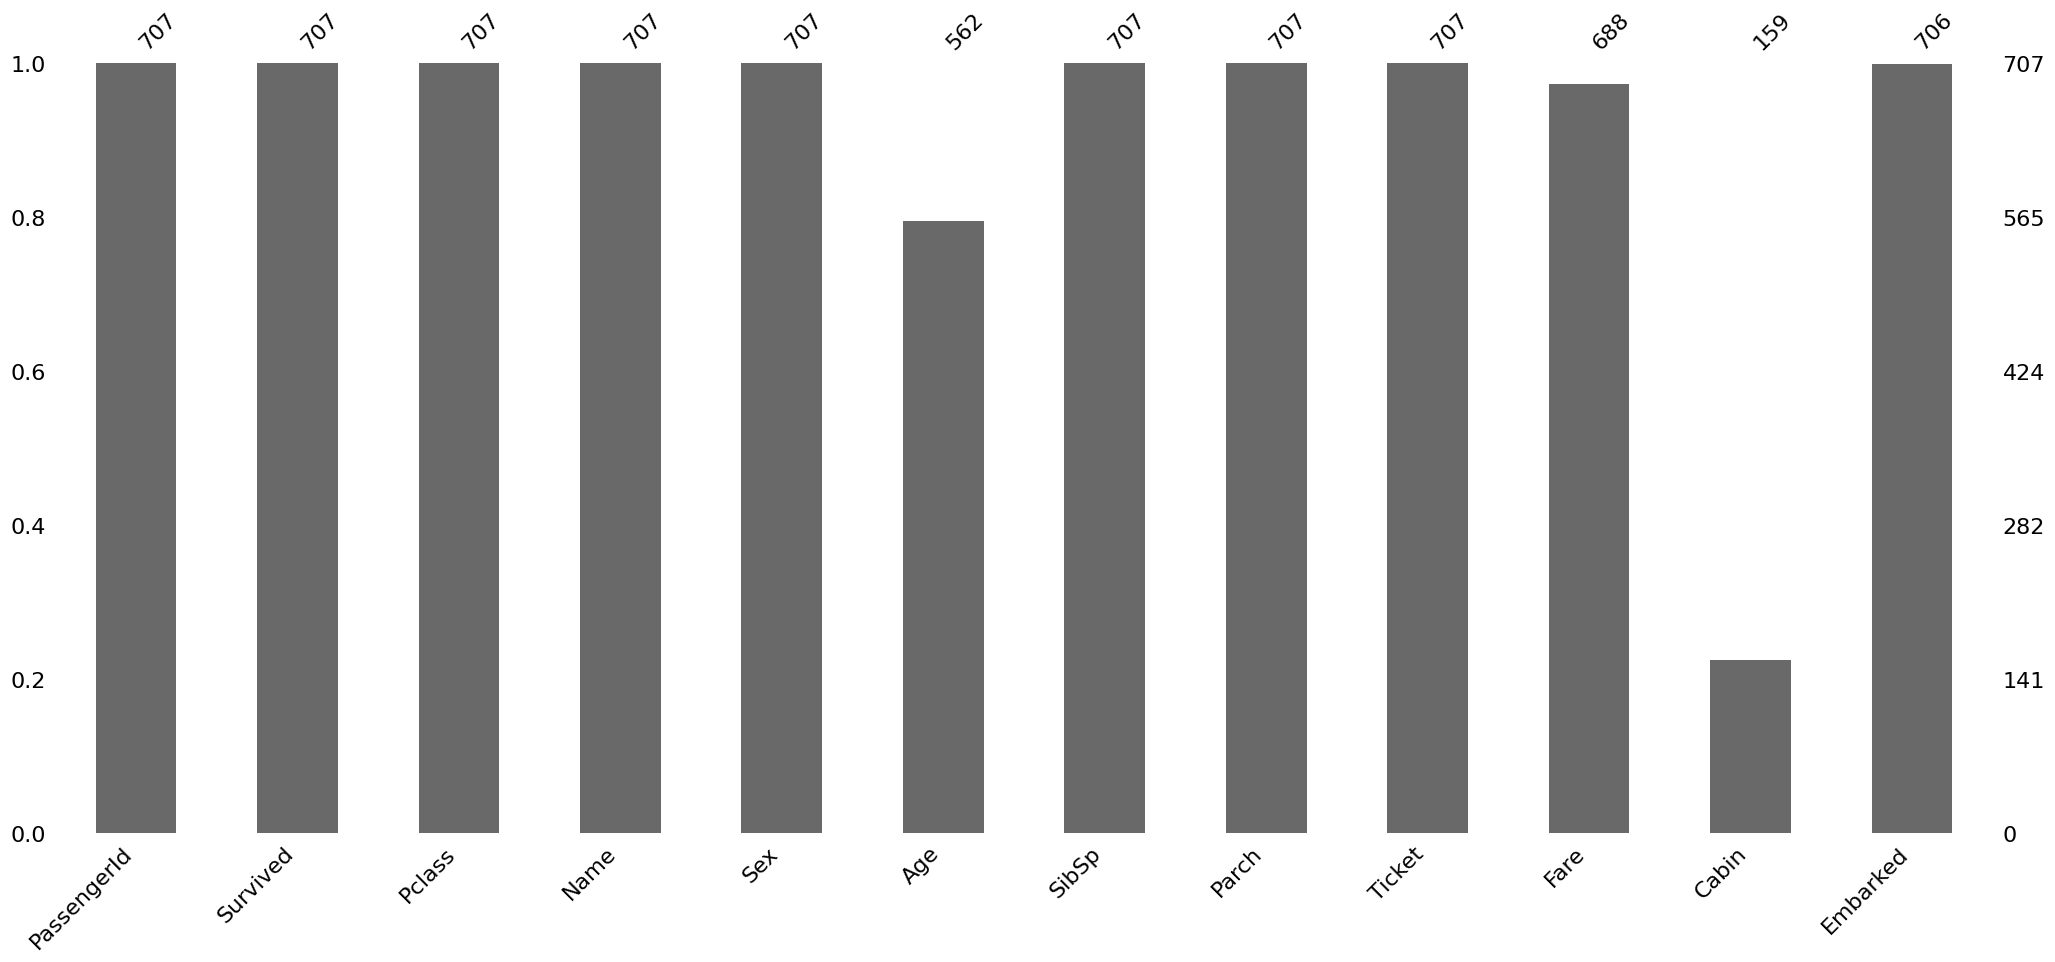

In [125]:
msno.bar(data)

In [126]:
data = data.drop(['Cabin'], axis=1)


In [127]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S


<Axes: >

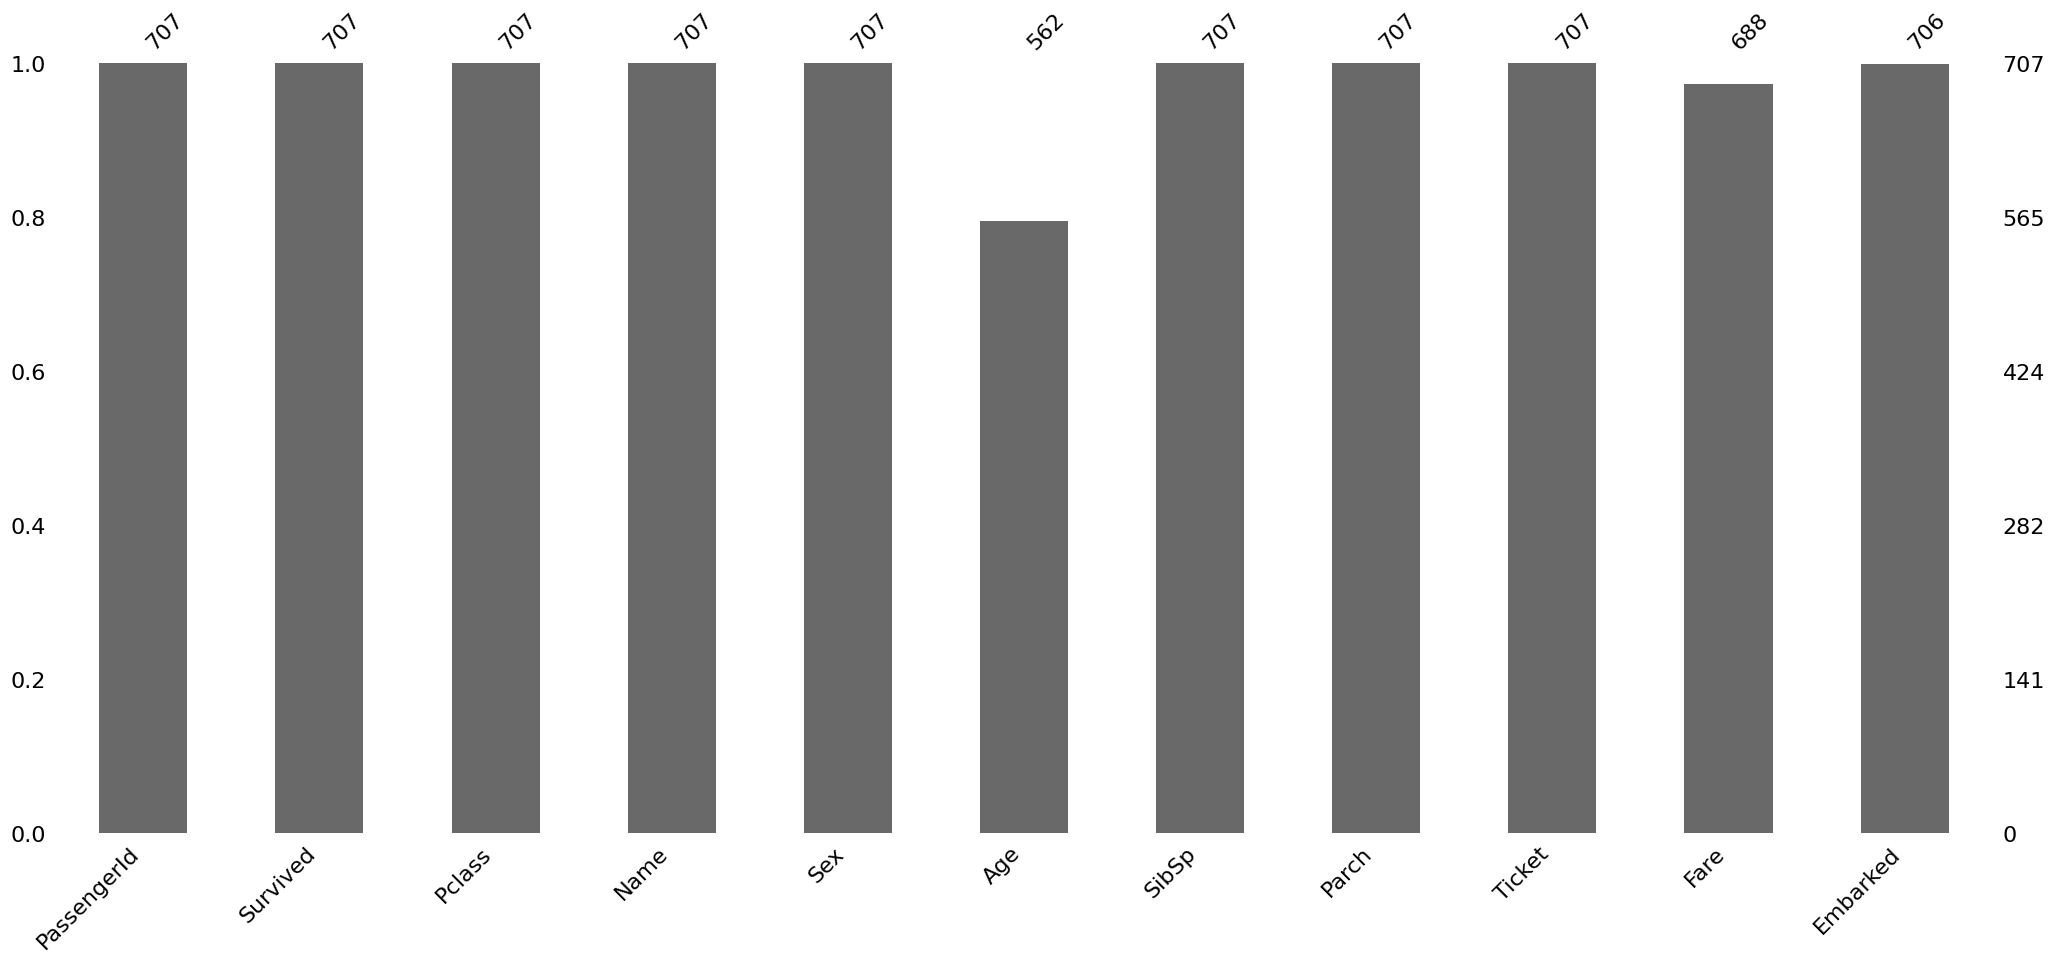

In [128]:
msno.bar(data)

In [129]:
# Age
data['Age'] = SimpleImputer(strategy='mean').fit_transform(data[['Age']])


In [130]:
# Fare
data['Fare'] = SimpleImputer(strategy='mean').fit_transform(data[['Fare']])


In [131]:
# Embarked
imp_mean_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,10:11] = imp_mean_embarked.fit_transform(data.iloc[:,10:11])

In [132]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [133]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])          
data['Embarked'] = le.fit_transform(data['Embarked'])

In [134]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,712.833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.100,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.050,2
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",0,18.0,0,1,2691,144.542,0
703,704,0,3,"Gallagher, Mr. Martin",1,25.0,0,0,36864,77.417,1
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,350025,78.542,2
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,39.0,0,0,250655,26.000,2


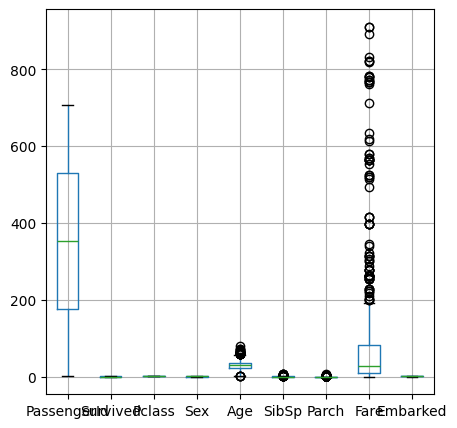

In [135]:
plt.figure(figsize=(5,5))
data.boxplot()
plt.show()

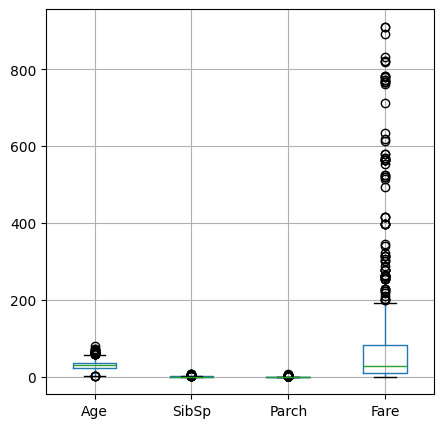

In [136]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [137]:
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_limit_Age = Q1_Age - 1.5 * IQR_Age
upper_limit_Age = Q3_Age + 1.5 * IQR_Age

In [138]:
data['Age'] = np.where(data['Age'] > upper_limit_Age, upper_limit_Age, np.where(data['Age'] < lower_limit_Age, lower_limit_Age, data['Age']))

In [139]:
Q1_sibsp = data['SibSp'].quantile(0.25)
Q3_sibsp = data['SibSp'].quantile(0.75)
IQR_sibsp = Q3_sibsp - Q1_sibsp
upper_limit_sibsp = Q3_sibsp + 1.5 * IQR_sibsp

In [140]:
data['SibSp'] = np.where(data['SibSp'] > upper_limit_sibsp, upper_limit_sibsp, data['SibSp'])


In [141]:
Q1_parch = data['Parch'].quantile(0.25)
Q3_parch = data['Parch'].quantile(0.75)
IQR_parch = Q3_parch - Q1_parch
upper_limit_parch = Q3_parch + 1.5 * IQR_parch

In [142]:
data['Parch'] = np.where(data['Parch'] > upper_limit_parch, upper_limit_parch, data['Parch'])


In [143]:
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
upper_limit_fare = Q3_fare + 1.5 * IQR_fare

In [144]:
data['Fare'] = np.where(data['Fare'] > upper_limit_fare, upper_limit_fare, data['Fare'])


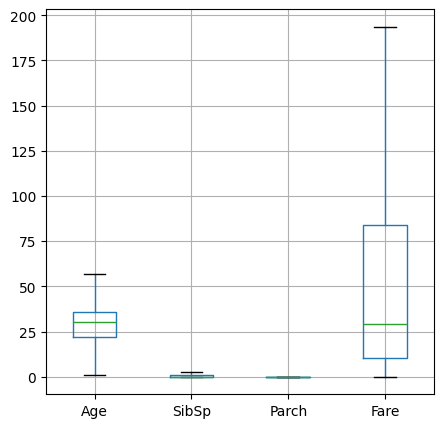

In [145]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [146]:
scaler = StandardScaler()
data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(data[['Age', 'Fare', 'SibSp', 'Parch']])


In [147]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.628747,0.776458,0.0,A/5 21171,-0.861231,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.665246,0.776458,0.0,PC 17599,2.145195,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.305249,-0.615065,0.0,STON/O2. 3101282,-0.850344,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.422622,0.776458,0.0,113803,-0.121706,2
4,5,0,3,"Allen, Mr. William Henry",1,0.422622,-0.615065,0.0,373450,-0.848328,2
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",0,-0.952246,-0.615065,0.0,2691,1.353182,0
703,704,0,3,"Gallagher, Mr. Martin",1,-0.386124,-0.615065,0.0,36864,0.270508,1
704,705,0,3,"Hansen, Mr. Henrik Juul",1,-0.305249,0.776458,0.0,350025,0.288653,2
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,0.746121,-0.615065,0.0,250655,-0.558808,2


In [148]:
data.shape

(707, 11)

In [149]:
output_path = 'datapenumpang_clean.csv'
data.to_csv(output_path, index=False)